# Hierarchical Clustering | [Link](https://github.com/AdilShamim8/50-Days-of-Machine-Learning/tree/main/Day%2047%20Hierarchical%20%26%20DBSCAN%20Clustering/Hierarchical%20Clustering)

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. There are two main types:

- **Agglomerative (Bottom-Up):** Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- **Divisive (Top-Down):** All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In this note, we focus on **agglomerative clustering**.

---

## Distance Metrics

A key component of clustering is measuring the distance between data points. One common metric is the **Euclidean distance**:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

$$   
\mathbf{x} = (x_1, x_2, \ldots, x_n) \quad \text{and} \quad \mathbf{y} = (y_1, y_2, \ldots, y_n)   
$$

---

## Linkage Criteria

When merging clusters, we need a way to define the distance between clusters. Common linkage methods include:

### 1. Single Linkage

The distance between two clusters \( A \) and \( B \) is defined as the minimum distance between any single point in \( A \) and any single point in \( B \):

$$
d_{\text{single}}(A, B) = \min_{x \in A,\, y \in B} \, d(x, y)
$$

### 2. Complete Linkage

The distance is the maximum distance between any single point in \( A \) and any single point in \( B \):

$$
d_{\text{complete}}(A, B) = \max_{x \in A,\, y \in B} \, d(x, y)
$$

### 3. Average Linkage

The distance is the average of all pairwise distances between points in the two clusters:

$$
d_{\text{average}}(A, B) = \frac{1}{|A|\,|B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
$$

### 4. Ward’s Method

Ward’s method minimizes the total within-cluster variance. The increase in variance when merging two clusters \( A \) and \( B \) can be computed as:

$$
\Delta(A, B) = \frac{|A|\,|B|}{|A| + |B|} \left\|\bar{x}_A - \bar{x}_B\right\|^2
$$

$$  
\bar{x}_A \quad \text{and} \quad \bar{x}_B \quad \text{are the centroids of clusters} \quad A \quad \text{and} \quad B, \text{ respectively.}  
$$

---

## Algorithm Outline (Agglomerative Clustering)

1. **Initialization:** Start with each data point in its own cluster.
2. **Compute Distances:** Calculate the pairwise distance matrix for all clusters.
3. **Merge Clusters:** Identify the two clusters with the smallest distance according to the chosen linkage criterion and merge them.
4. **Update Distance Matrix:** Recompute the distances between the new cluster and all remaining clusters.
5. **Repeat:** Continue merging until only a single cluster remains (or until a desired number of clusters is reached).
6. **Dendrogram:** The sequence of merges can be visualized using a dendrogram, which illustrates the hierarchical structure.

---

## Python Example

Below is a Python code snippet using SciPy's `hierarchy` module to perform agglomerative clustering and plot a dendrogram.

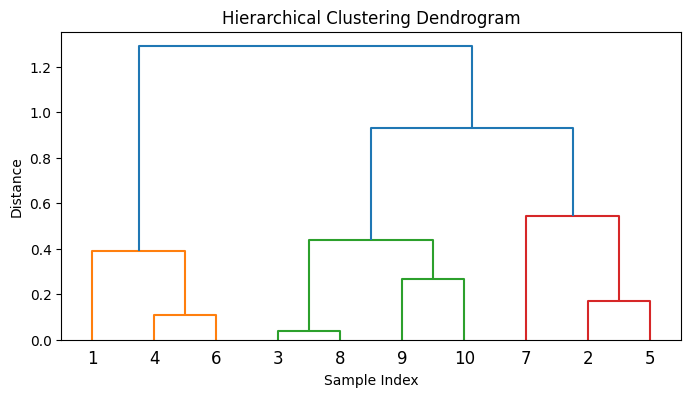

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random data
np.random.seed(42)
data = np.random.rand(10, 2)

# Compute the linkage matrix using the Ward method
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=np.arange(1, len(data) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()